<a href="https://colab.research.google.com/github/36ruSer/-/blob/main/%D0%B8%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BA_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D1%83_%D0%BF%D0%BE_%D0%BA%D1%83%D1%80%D1%81%D1%83_%22Python_%D0%B4%D0%BB%D1%8F_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Загрузите файл HR.csv в pandas dataframe

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#2 Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#4 Рассчитайте сколько сотрудников работает в каждомдепартаменте.

In [ ]:
department_counts = df['department'].value_counts()
print('Количество сотрудников в каждом департаменте:')
print(department_counts)

Количество сотрудников в каждом департаменте:
department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64


#5 Показать распределение сотрудников по зарплатам.

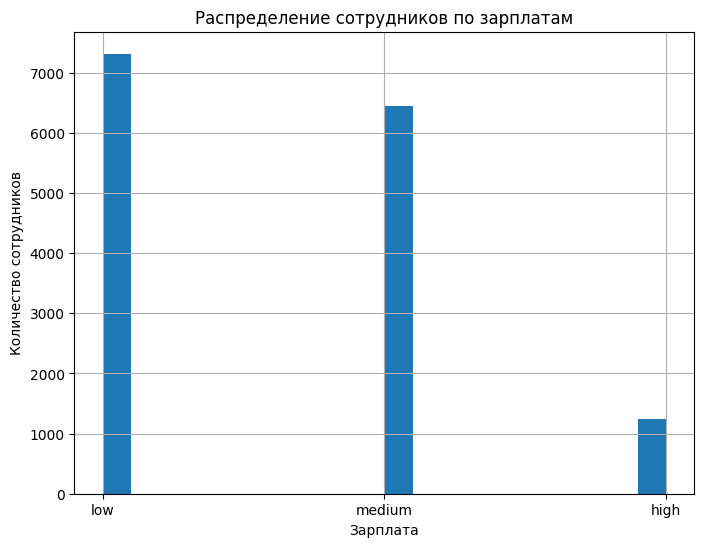

In [ ]:
plt.figure(figsize=(8, 6))
df['salary'].hist(bins=20)
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.show()

#6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

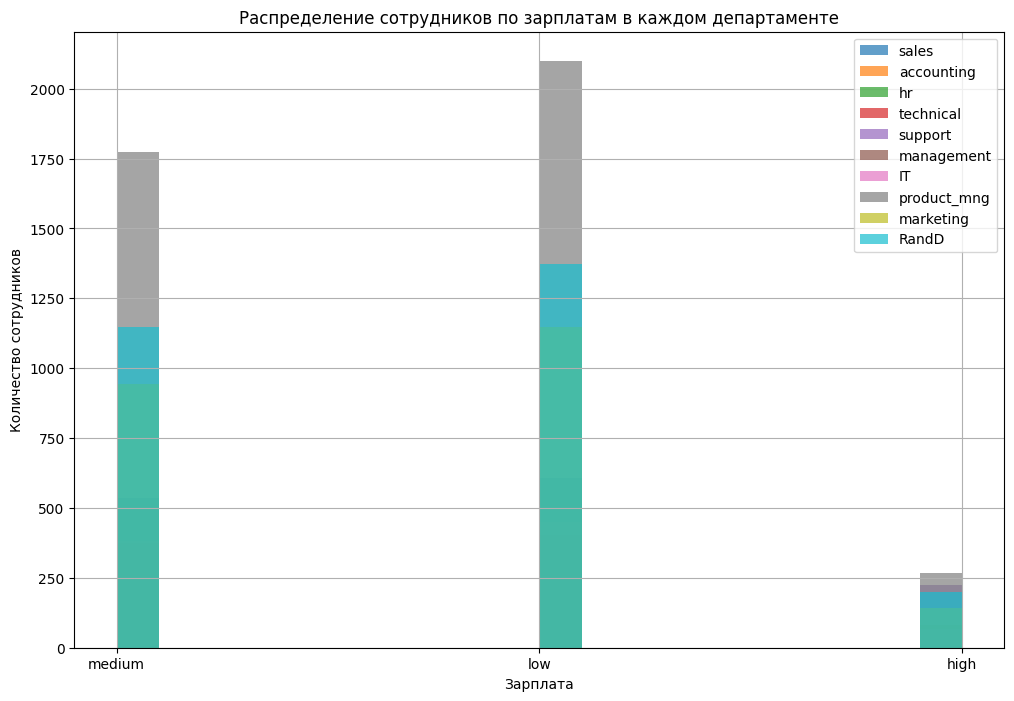

In [ ]:
plt.figure(figsize=(12, 8))
df.groupby('department')['salary'].hist(bins=20, alpha=0.7)
plt.title('Распределение сотрудников по зарплатам в каждом департаменте')
plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.legend(df['department'].unique())
plt.show()

#7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [ ]:
import scipy.stats as stats

# Разделим сотрудников на две группы: с высоким и низким окладом
high_salary = df[df['salary'] == 'high']
low_salary = df[df['salary'] == 'low']

# Проведем статистический тест (например, t-test)
t_stat, p_value = stats.ttest_ind(high_salary['time_spend_company'], low_salary['time_spend_company'])

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом")
else:
    print("Не удается отвергнуть нулевую гипотезу: нет достаточных доказательств, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом")

Отвергаем нулевую гипотезу: сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом


#8 Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов

In [ ]:

# Делим данные на уволившихся и не уволившихся сотрудников
left = df[df['left'] == 1]
not_left = df[df['left'] == 0]

# Считаем долю сотрудников с повышением за последние 5 лет
left_promotion_rate = left['promotion_last_5years'].mean()
not_left_promotion_rate = not_left['promotion_last_5years'].mean()

# Счмиаем среднюю степень удовлетворенности
left_satisfaction = left['satisfaction_level'].mean()
not_left_satisfaction = not_left['satisfaction_level'].mean()

# Считаем среднее количество проектов
projects_left = left['number_project'].mean()
projects_not_left = not_left['number_project'].mean()

# Выводим результаты
print("Уволившиеся сотрудники:")
print("Доля сотрудников с повышением за последние 5 лет:", left_promotion_rate)
print("Средняя степень удовлетворенности:", left_satisfaction)
print("Среднее количество проектов:", projects_left)
print()
print("Не уволившиеся сотрудники:")
print("Доля сотрудников с повышением за последние 5 лет:", not_left_promotion_rate)
print("Средняя степень удовлетворенности:", not_left_satisfaction)
print("Среднее количество проектов:", projects_not_left)

Уволившиеся сотрудники:
Доля сотрудников с повышением за последние 5 лет: 0.005320638476617194
Средняя степень удовлетворенности: 0.4400980117614114
Среднее количество проектов: 3.8555026603192384

Не уволившиеся сотрудники:
Доля сотрудников с повышением за последние 5 лет: 0.026251312565628283
Средняя степень удовлетворенности: 0.666809590479524
Среднее количество проектов: 3.786664333216661


#3 Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.

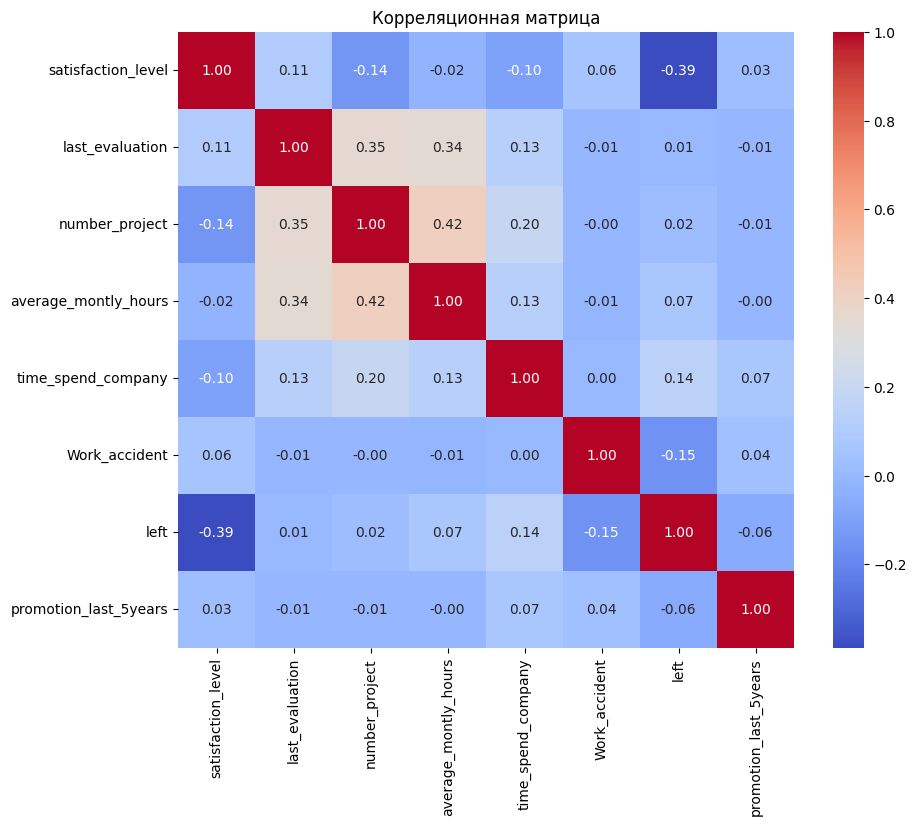

Самые скоррелированные переменные:
 number_project        average_montly_hours    0.417211
average_montly_hours  number_project          0.417211
dtype: float64

Наименее скоррелированные переменные:
 satisfaction_level  satisfaction_level    0.0
last_evaluation     last_evaluation       0.0
dtype: float64


In [ ]:
# Выбор только числовых столбцов
numeric_df = df.select_dtypes(include=['number'])

# Рассчитываем корреляционную матрицу
correlation_matrix = numeric_df.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()

# Определение самых и наименее скоррелированных переменных
abs_corr = correlation_matrix.abs()
np.fill_diagonal(abs_corr.values, 0)

most_correlated = abs_corr.stack().nlargest(2)
least_correlated = abs_corr.stack().nsmallest(2)

print("Самые скоррелированные переменные:\n", most_correlated)
print("\nНаименее скоррелированные переменные:\n", least_correlated)

#9 Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department иsalary). Оценить качество модели на тестовой выборки.

In [ ]:
# Разделим данные на тестовую и обучающую выборки:
from sklearn.model_selection import train_test_split

# Выберем только необходимые признаки
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']]
y = df['left']

# Разделим данные на тестовую и обучающую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Построим модель LDA, предсказывающую, уволился ли сотрудник:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)


#Оценим качество модели на тестовой выборке:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = lda.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))



Accuracy: 0.7496666666666667
Precision: 0.4409448818897638
Recall: 0.23796033994334279
F1-score: 0.3091076356945722


1. Accuracy: 0.7496666666666667 (около 75%)
   модель правильно классифицирует около 75%.

2. Precision: 0.4409448818897638 (около 44%)
 Это означает, что из всех объектов, которые модель предсказала как "уволенные", только 44% на самом деле были уволенными

3. Recall: 0.23796033994334279 (около 24%)
модель смогла правильно предсказать только 24% реально уволенных сотрудников. То есть она пропускает большую часть уволенных.

4. F1-score: 0.3091076356945722 (около 31%)
F1-score - это  среднее между precision и recall, учитывает точность и полноту. Значение около 31% говорит о том, что качество модели в целом не очень высокое.

Таким образом, можно сделать вывод, что модель LDA не слишком хорошо справляется с задачей прогнозирования увольнения сотрудников на основе доступных данных (без учета department и salary). Модель склонна давать много ложных предсказаний и пропускать значительную часть реально уволенных сотрудников.

In [ ]:
# Разделим данные на тестовую и обучающую выборки
from sklearn.model_selection import train_test_split

# Выберем только необходимые признаки
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']]
y = df['left']

# Разделим данные на тестовую и обучающую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построим модель LDA, предсказывающую, уволился ли сотрудник
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Оценим качество модели на тестовой выборке
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = lda.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))


Accuracy: 0.7496666666666667
Precision: 0.4409448818897638
Recall: 0.23796033994334279
F1-score: 0.3091076356945722
